##### <h1 id="aa" align="center" style="color:white;background:#8B0000;padding:18px;border-radius:15px 50px; font-family:newtimeroman;"> КЛАСТЕРИЗАЦИЯ СОРТОВ ВИНА </h1> 

<img src="https://catherineasquithgallery.com/uploads/posts/2021-03/1614584750_25-p-vino-na-belom-fone-27.jpg">

##### <h1 id="bb" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Вступление </h1> 
В данной работе предстоит проанализировать данные и разбить их на кластеры. Для этого потребуется применить "обучение без учителя", так как признак "class" будет скрыт до момента сравнения работы моделей. Однако остается еще однин этап, который завершит работу. После обучения моделей следует изучить кластеры, чтобы понять, как каждый признак влияет на формирование классов.




<h1 id="aa" style="color:white;background:#B00000;padding:8px;border-radius:8px; font-family:newtimeroman;" > Цели: </h1>
<ul>
<li> Изучить закономерности в предоставленных данных </li>
<li> Применить метод главных компонент</li>
<li> Выполнить задачу кластеризации </li>
<li> Сравнить предсказанные результаты с реальными значениями</li>
<li> Проанализировать кластеры</li>
</ul>
 

<h1 id="aa" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Описание набора данных </h1>

Эти данные результат химического анализа вин, выращенных в одном регионе Италии, но произведены из трех разных сортов. Набор данных состоит из 13 количественных признаков, характеризующих 3 типа вина.

Расшифровка каждого атрибута:
<ul>
<li> class : Класс вина (1,2,3) </li>
<li> Alcohol : Содержание алкоголя в процентах </li>
<li> Malic acid : Яблочная кислота</li>
<li> Ash : Содержание золы </li>
<li> Alcalinity of ash : Щелочность золы </li>
<li> Magnesium : Магний </li>
<li> Total phenols : Общие фенолы </li>    
<li> Flavanoids : Флаваноиды </li>  
<li>Nonflavanoid phenols :Нефлаваноидные фенолы</li> 
<li>Proanthocyanins : Проантоцианы</li> 
<li>Color intensity : Интенсивность окраски</li> 
<li>Hue : Оттенок</li> 
<li>OD280/OD315 of diluted wines : OD280/OD315 разбавленного вина</li> 
<li>Proline : Пролин</li> 
</ul>



<h1 id="aa" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Загрузка данных </h1>

## Подключение необходимых библиотек и функций

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import plotly.express as px
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering, SpectralClustering


import warnings
warnings.filterwarnings('ignore')

## Обзор датасета

In [2]:
colnames = ['class', 'Alcohol', 'Malicacid',\
            'Ash', 'Alcalinity_of_ash', 'Magnesium','Total_phenols','Flavanoids',\
            'Nonflavanoid_phenols','Proanthocyanins',\
            'Color_intensity','Hue','0D280_0D315','Proline']

df = pd.read_csv('wine.data', sep=',', names = colnames, header=None )
X = df.iloc[:, 1:]
y = df.iloc[:, 0]
Xcol = X.columns

In [3]:
X

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


<h1 id="aa" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Разведочный анализ </h1>

## Общая информация

In [4]:
X.describe()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
pd.concat([X.dtypes,X.nunique()], axis=1).rename(columns={0: "Type", 1: "Number of unique"})

,Type,Number of unique
Alcohol,float64,126
Malicacid,float64,133
Ash,float64,79
Alcalinity_of_ash,float64,63
Magnesium,int64,53
Total_phenols,float64,97
Flavanoids,float64,132
Nonflavanoid_phenols,float64,39
Proanthocyanins,float64,101
Color_intensity,float64,132


## Идентификация корреляций между переменными

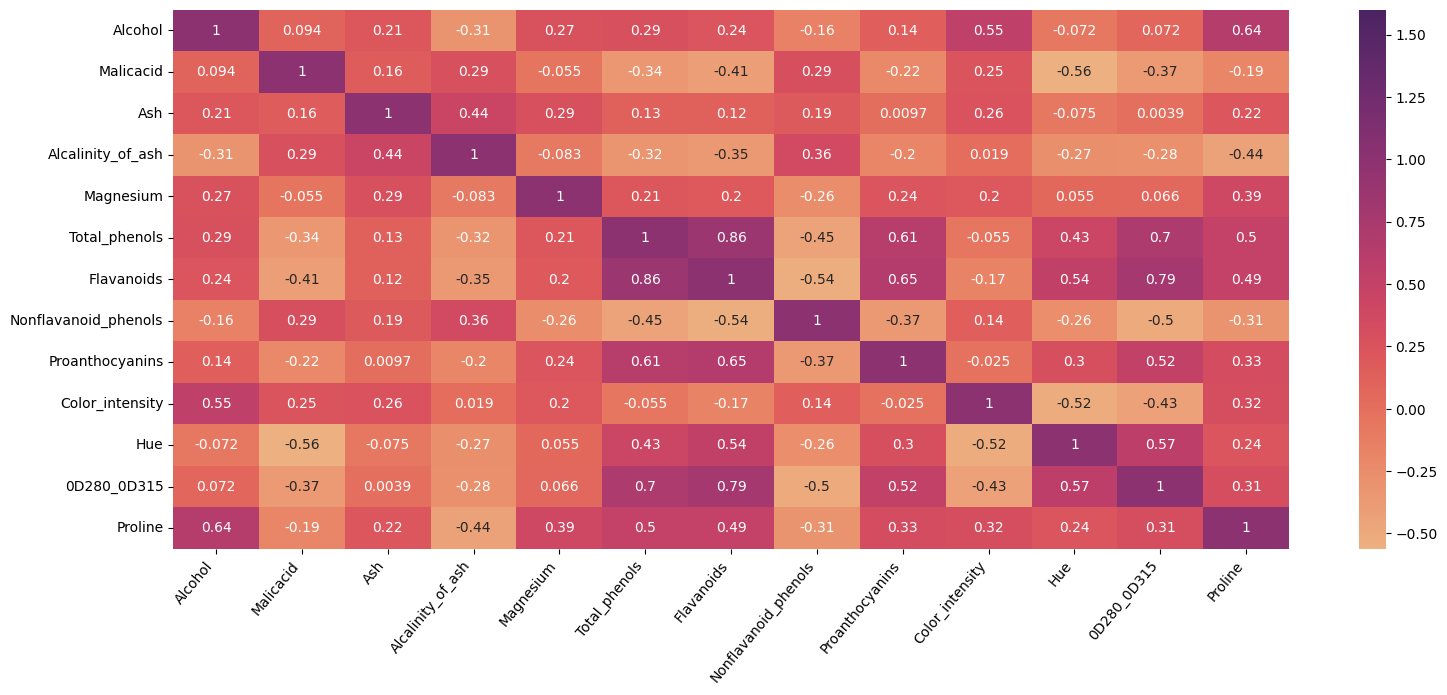

In [6]:
plt.figure(figsize = (18,7))
sns.heatmap(X.corr(),cmap = sns.color_palette("flare", as_cmap=True),annot = True,vmax = 1.6);
plt.xticks(rotation=50, ha='right');

## Распределение данных

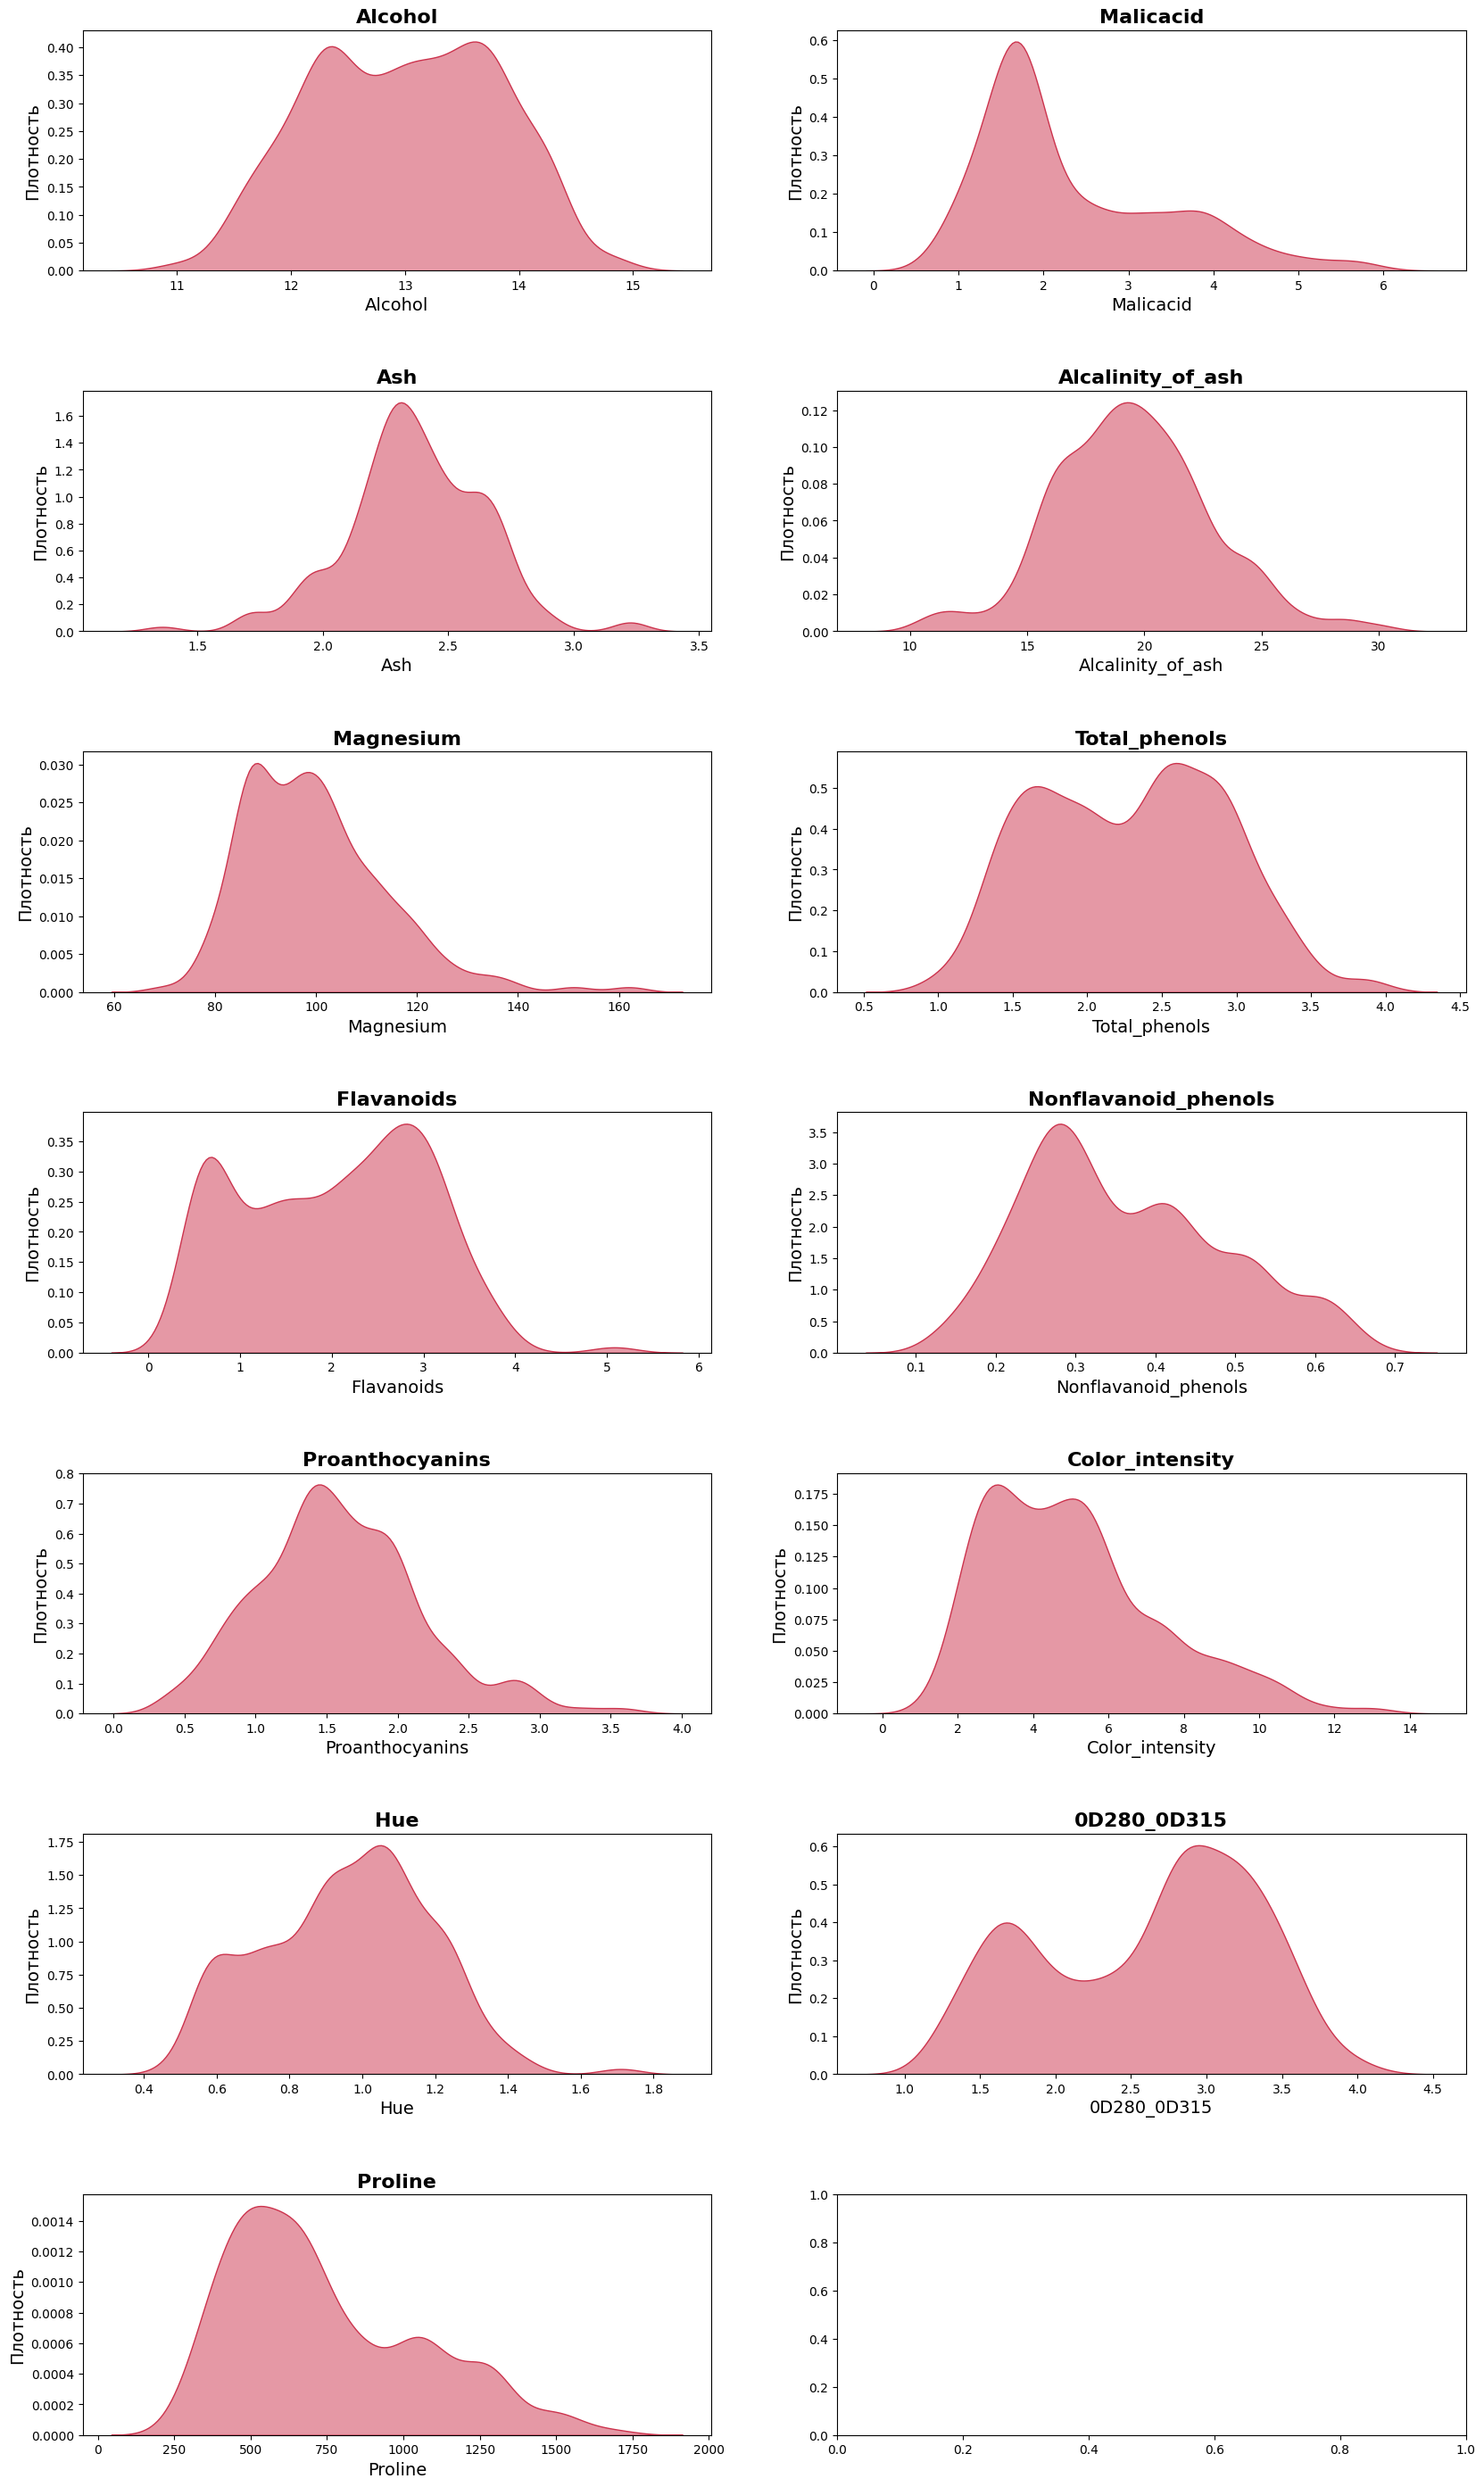

In [7]:
# Создаем матрицу графиков для визуализации распредления по каждой переменной
fig, axes = plt.subplots(7,2, figsize = (20,35))

# Расстояние между графиками
plt.subplots_adjust(hspace=0.5)

# Список значений признаков для цикла
columns = X.columns

# Строим распределения (kdeplot) для каждого признака
for i, column in enumerate(columns):
    ax = axes[i // 2, i % 2]
    sns.kdeplot(data = X,
                x = column,
                fill = True,
                alpha = 0.5,
                bw_adjust=.7,
                color = [0.8, 0.2, 0.3],
                ax = ax)
    
    ax.set_title(column, fontweight = 'bold', fontsize = 16)
    ax.set_xlabel(column, fontsize = 14)
    ax.set_ylabel('Плотность', fontsize = 14)
    

plt.show()

<ul>
<li>  Некоторые признаки близки к нормальному распределению (Proanthocyanins, Alcalinity_of_ash)</li> 
<li> Остальные признаки имеют скос или несколько мод (в основном 2)</li> 
<li> Явновыраженных выбросов не обнаружено</li>
<li> Признаки имеют разные масштабы измерений. Есть и сходство, но в основном различие на порядок, а в некоторых случаях даже на 2</li>
</ul>

<h1 id="aa" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Нормализация </h1>


Из того, что большинство признаков имеют отличное от нормального распределение, следует, что стандартизация не лучший вариант. Вместно нее лучше подойдет MinMax.

In [8]:
mms = MinMaxScaler()
X=pd.DataFrame(mms.fit_transform(X), columns=X.columns)

<h1 id="aa" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Метод главных компонет </h1>


Метод главных компонент может быть полезен в задаче классификации при большом количестве признаков, так как значительно улучшает результаты работы ансамблевых методов. Однако в данном случае решается задача кластеризация, где всего 13 признаков, поэтому он будет использоваться только для упрощения восприятия данных в виде двумерного и трехмерного графиков. 

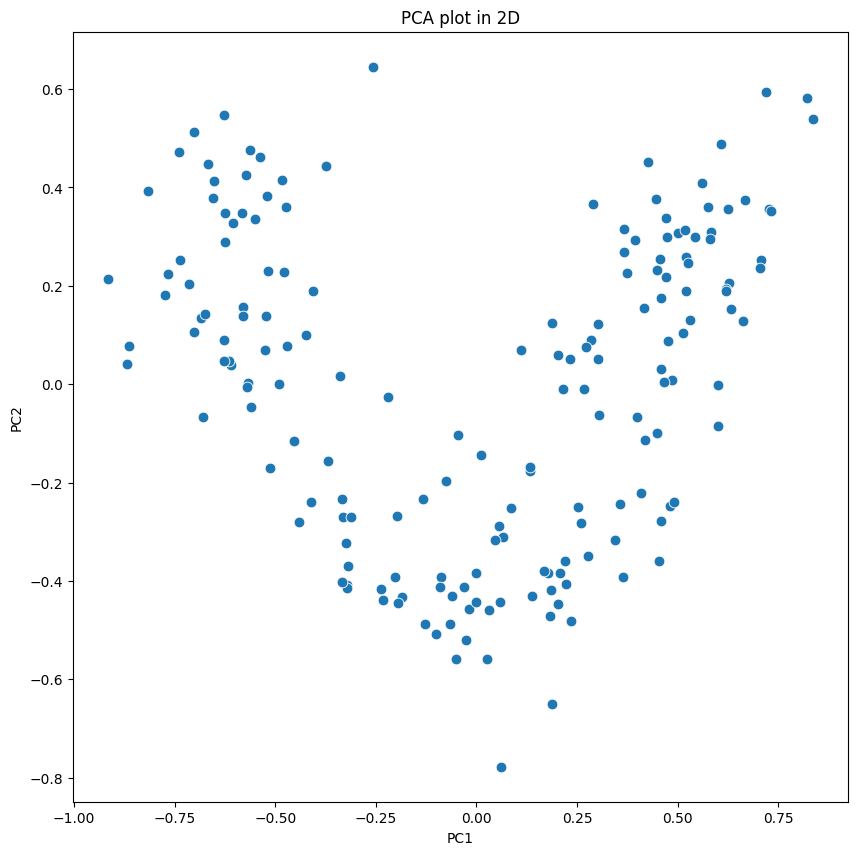

In [9]:
principal_df = pd.DataFrame(data = PCA(n_components=2).fit_transform(X))
    
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x = principal_df.iloc[:,0], 
                y = principal_df.iloc[:,1], 
                s=60)

plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2');

In [10]:
def TSNEplot(pred=None):    
    tsne = TSNE(random_state=1)

    X_tsne = tsne.fit_transform(X)

    plt.figure(figsize=(12, 10))
    plt.scatter(X_tsne[:, 0], 
                X_tsne[:, 1], 
                c = pred, 
                edgecolor="none", 
                alpha=0.7, s=40,
        cmap=plt.cm.get_cmap("flare", 3))

    plt.colorbar()
    plt.title("t-SNE projection");

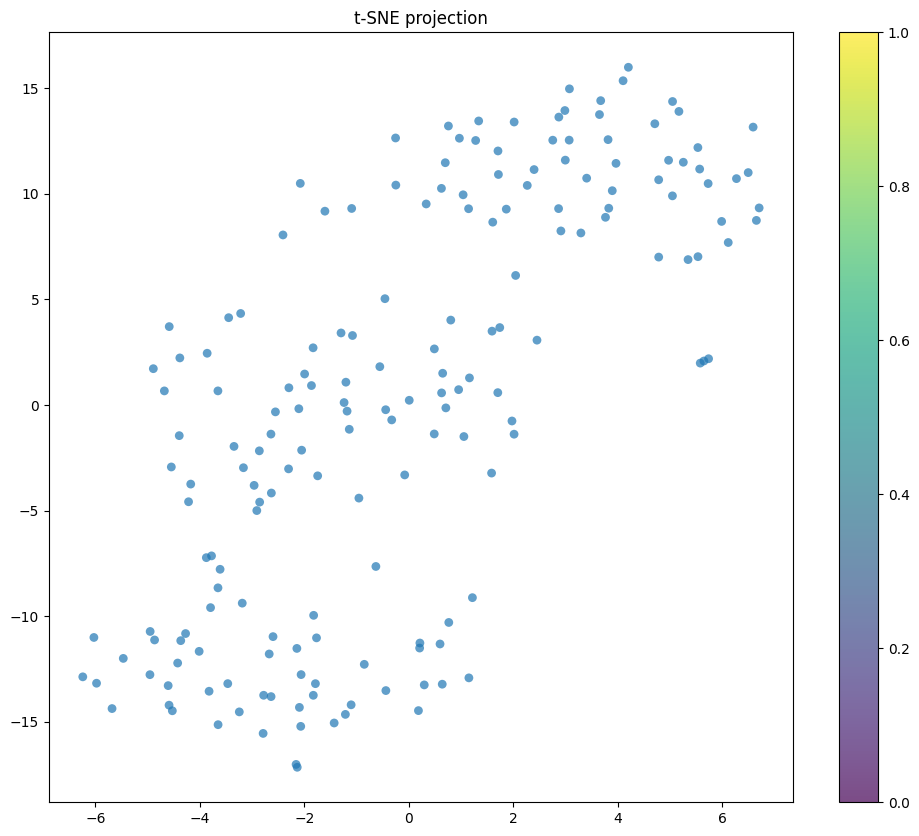

In [11]:
TSNEplot()

In [12]:
def PCAplot3D(x_data, y_data=None):
    components = PCA(n_components=3).fit_transform(x_data)

    fig = px.scatter_3d(
        components, 
        x=0, y=1, z=2, 
        color=y_data, 
        size=0.1*np.ones(len(X)), 
        opacity = 1,
        title='PCA plot in 3D',
        labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
        width=900, height=900
    )
    fig.show()

In [13]:
PCAplot3D(X)

<h1 id="aa" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Моделирование </h1>

### Выбор метода кластеризации


Кластеризация ассоциируется с методом k-средних. Однако он не являтся единственным, только в библиотеке scikit-learn представлено 11 методов, некоторые из них могут решать общие задачи, другие - лучше справятся с определенным типом. 


В данном случае известно следущее: 
<ul>
<li> Набор данных разбит на 3 класса </li>
<li> Количество данных не слишком велико</li>
<li> При визуальном осмотре можно выделить 3 кластера </li>
<li> Проекция на плоскость имеет достаточно большую дисперсию</li>
</ul>

Выбор пал на методы K-Means, Spectral Clustering и Agglomerative Clustering by Ward. Главным параметром у них является число кластеров, а на графике распределения, схожим с нашим, методы демонстрируют достаточно хорошую работу.

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png">

# K-Means

In [14]:
pca = PCA(n_components=2)

kmeans = KMeans(n_clusters=3, random_state=1, n_init='auto').fit(X)
centroids_pca = pca.fit_transform(kmeans.cluster_centers_)
pred_k = kmeans.labels_

principal_df = pd.DataFrame(data = PCA(n_components=2).fit_transform(X))

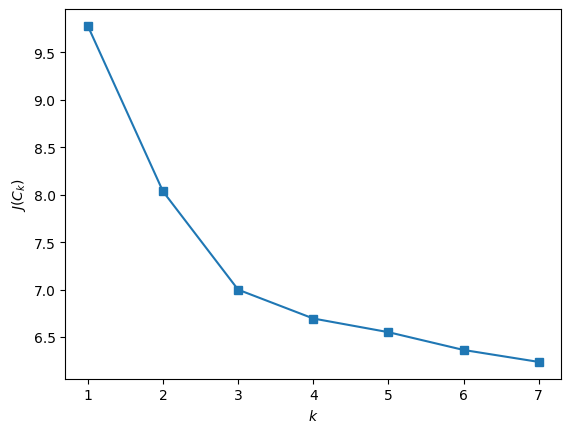

In [15]:
inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1, n_init='auto').fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))
    
plt.plot(range(1, 8), inertia, marker="s")
plt.xlabel("$k$")
plt.ylabel("$J(C_k)$");

In [16]:
pca = PCA(n_components=2)


kmeans = KMeans(n_clusters=3, random_state=1, n_init='auto').fit(X)
centroids_pca = pca.fit_transform(kmeans.cluster_centers_)
pred_k = kmeans.labels_

principal_df = pd.DataFrame(data = PCA(n_components=2).fit_transform(X))

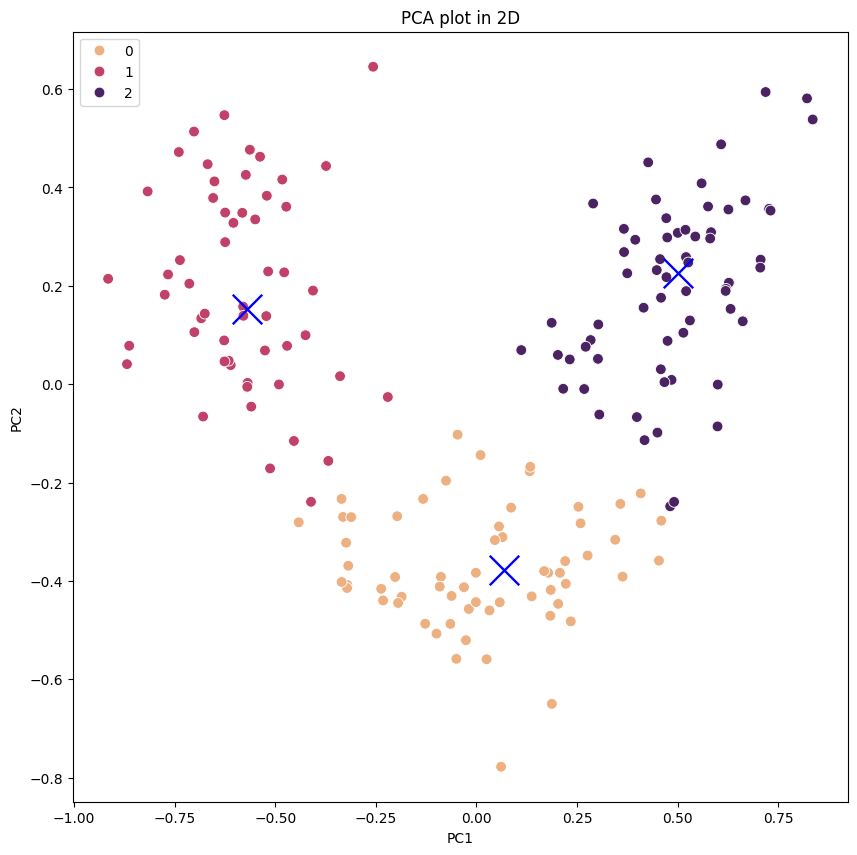

In [17]:
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x = principal_df.iloc[:,0], 
                y = principal_df.iloc[:,1], 
                hue = pred_k, 
                palette="flare", 
                s=60)
sns.scatterplot(x = centroids_pca[:,0], 
                y =  centroids_pca[:,1],  
                marker="x", 
                s=450, 
                color = 'blue')
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2');

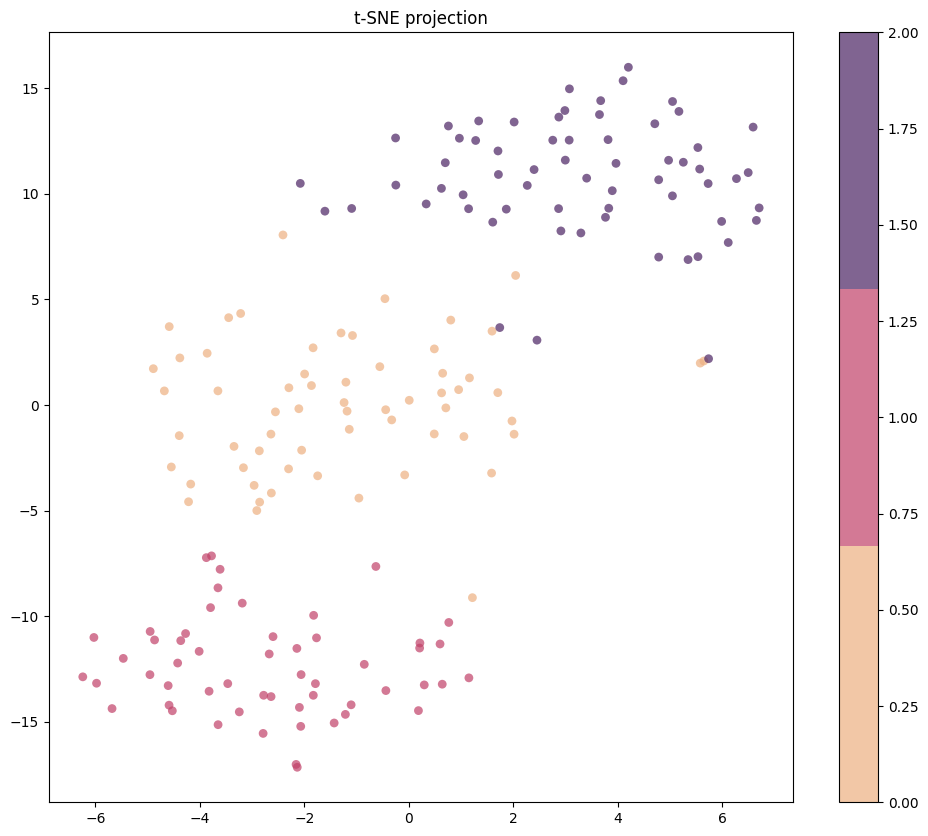

In [18]:
TSNEplot(pred_k)

In [19]:
PCAplot3D(X, pred_k)

# Agglomerative Clustering by Ward

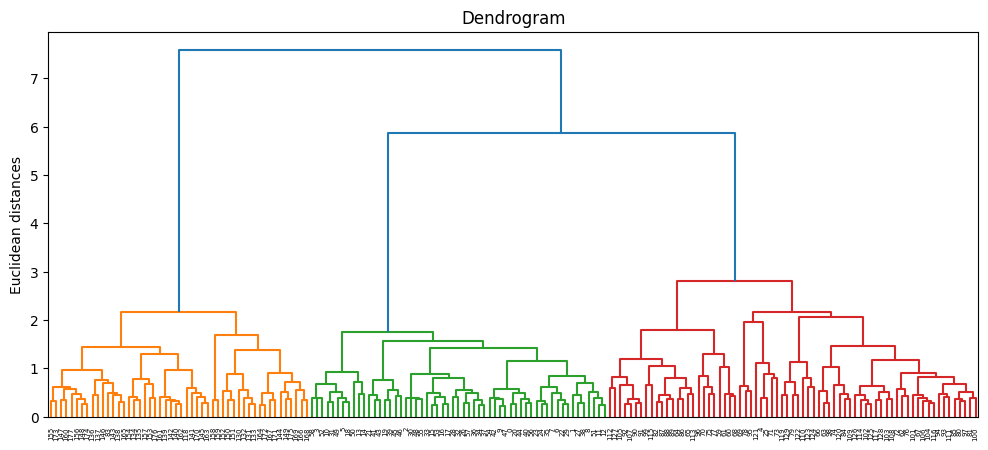

In [20]:
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot
pyplot.figure(figsize=(12, 5))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()

In [21]:
clustering_ward = AgglomerativeClustering(3).fit(X)
pred_ward = clustering_ward.labels_

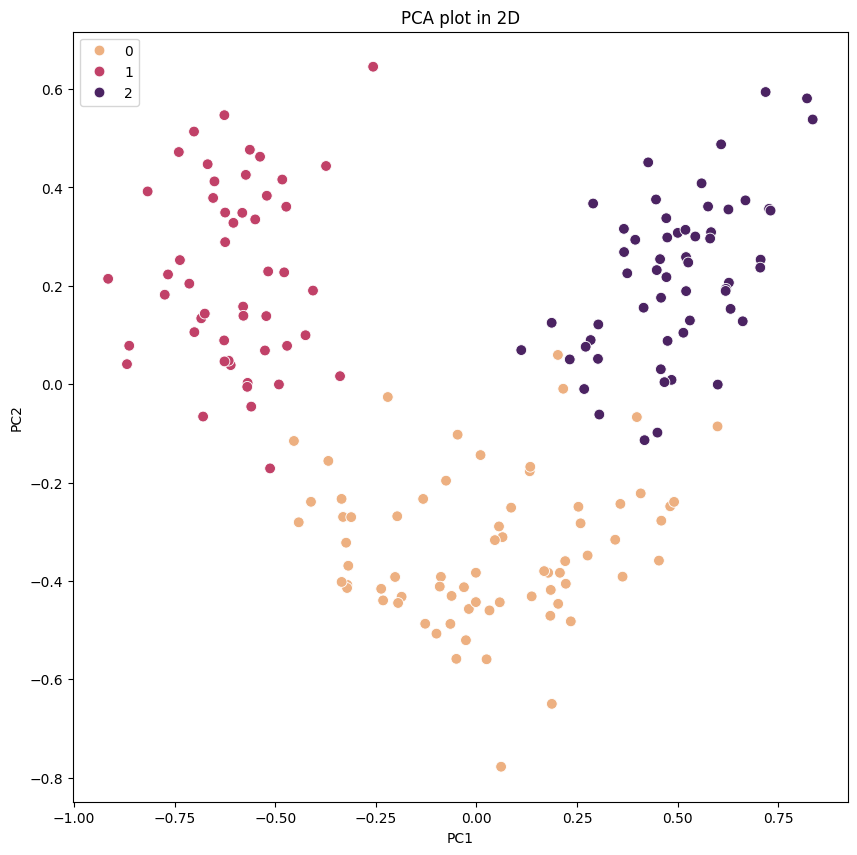

In [22]:
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x = principal_df.iloc[:,0], 
                y = principal_df.iloc[:,1], 
                hue = pred_ward, 
                palette="flare", 
                s=60)
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2');

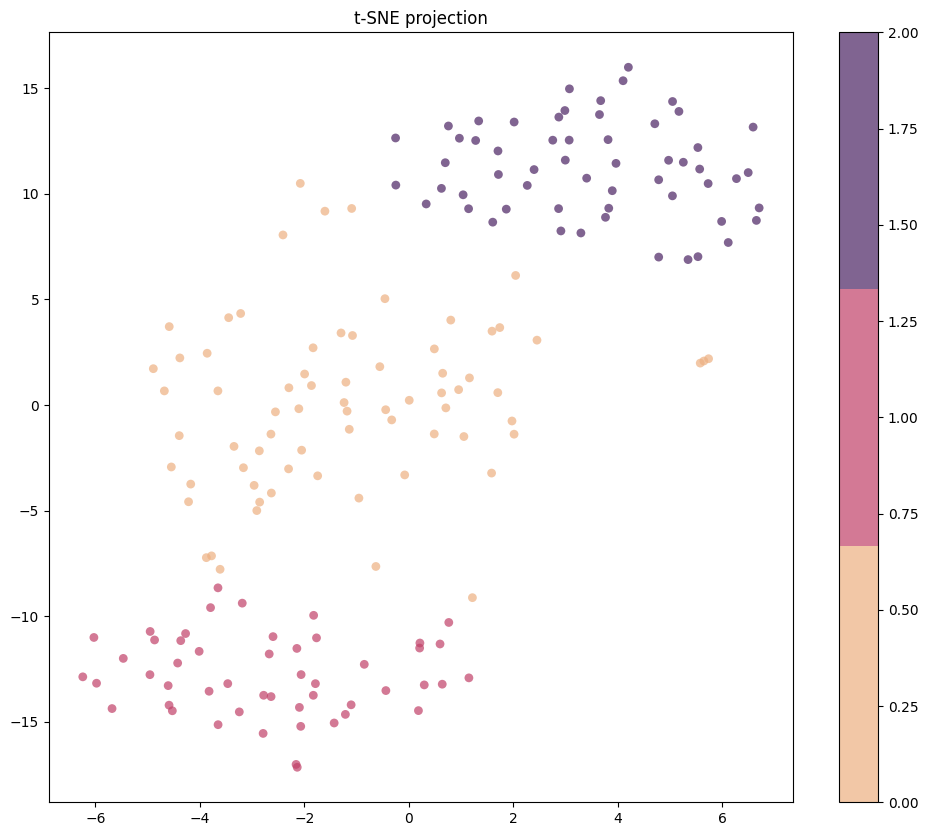

In [23]:
TSNEplot(pred_ward)

In [24]:
PCAplot3D(X, pred_ward)

# Spectral Clustering

In [25]:
clustering_sp = SpectralClustering(3).fit(X)
pred_sp = clustering_sp.labels_

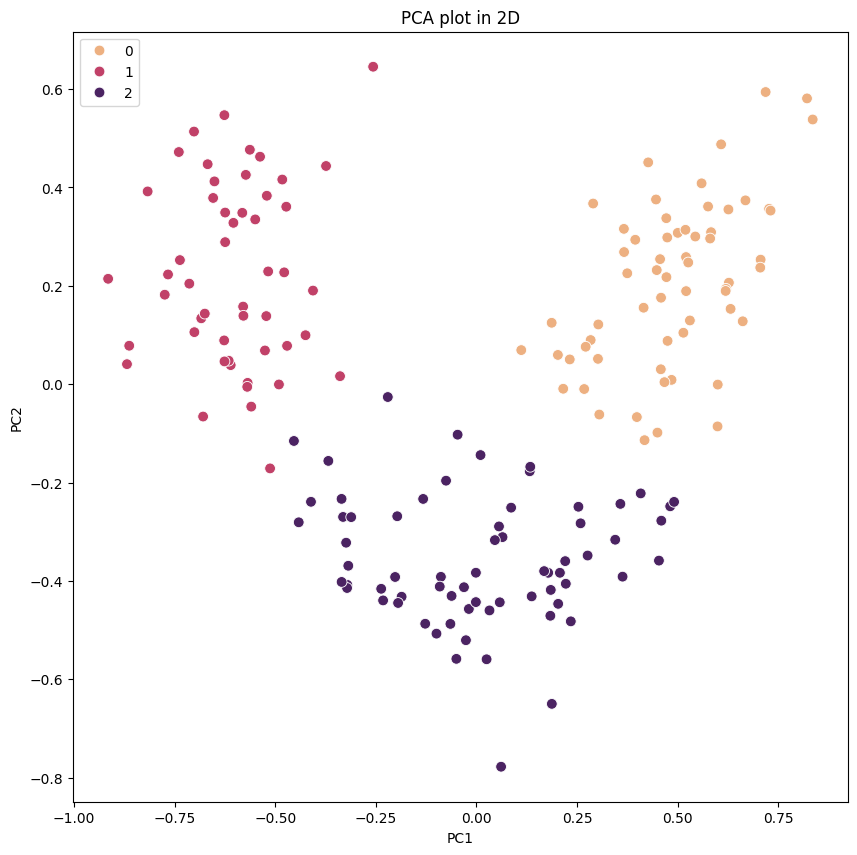

In [26]:
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x = principal_df.iloc[:,0], 
                y = principal_df.iloc[:,1], 
                hue = pred_sp, 
                palette="flare", 
                s=60)
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2');

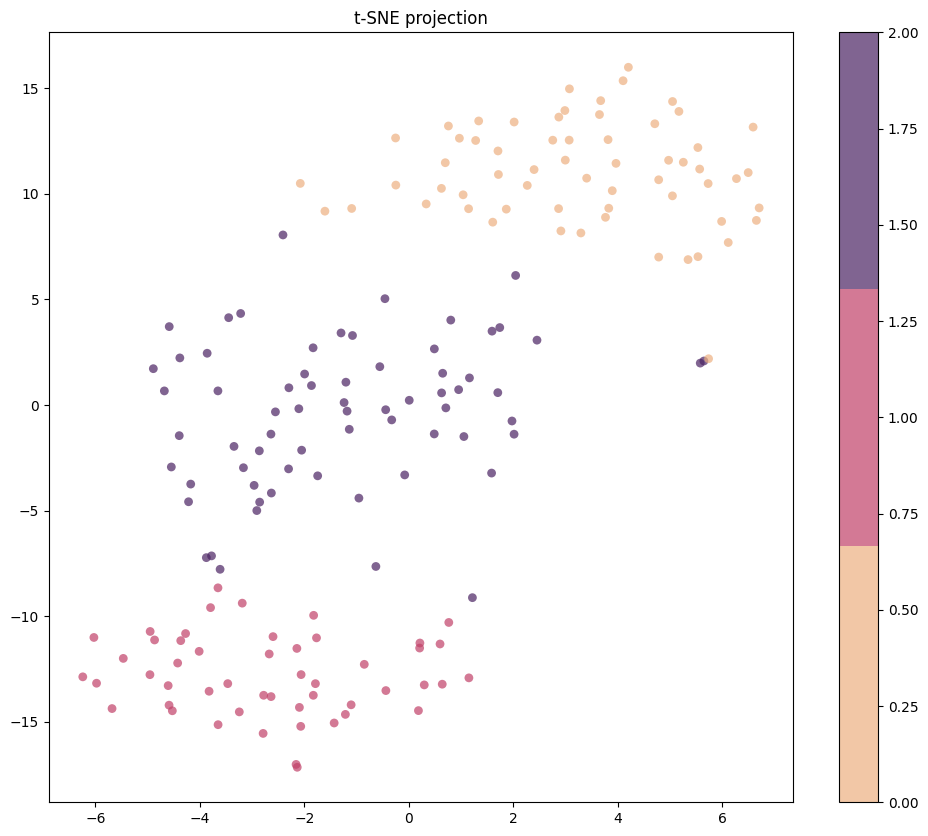

In [27]:
TSNEplot(pred_sp)

In [28]:
PCAplot3D(X, pred_sp)

<h1 id="aa" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Сравнение реальных и предсказанных кластеров </h1>

## Обзор целевой переменной

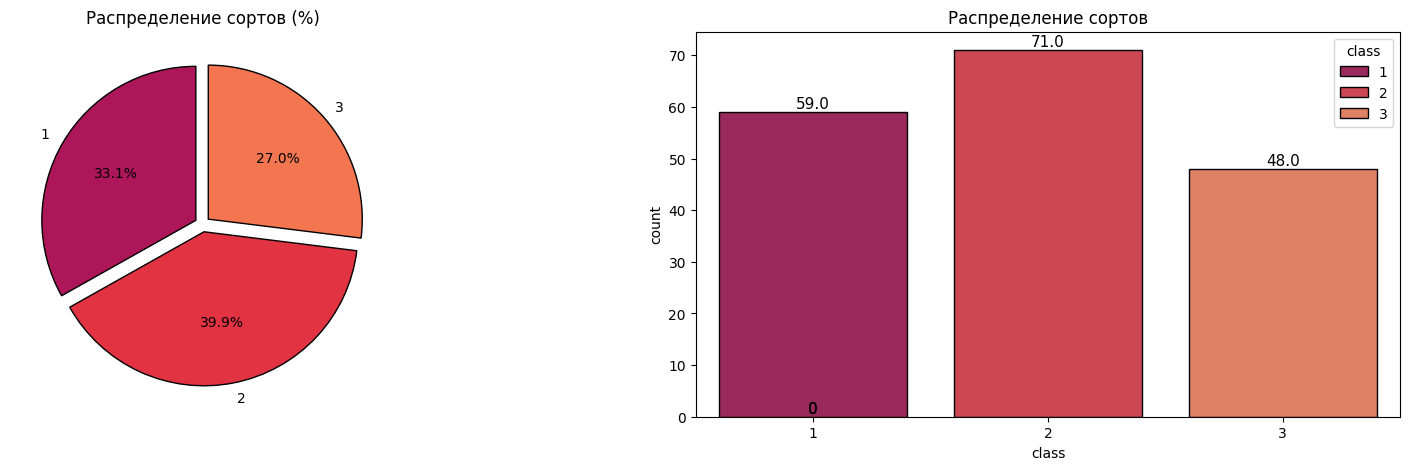

In [29]:
l = list(df['class'].value_counts())
sumLenn = sum(l)
proc = [l[1] / sumLenn * 100, l[0] / sumLenn * 100, l[2] / sumLenn * 100]
colors1 = sns.color_palette("rocket")[2:5]


fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (20, 5))
plt.subplot(1, 2, 1)
plt.pie(proc, labels = ['1', '2', '3'], 
        autopct = '%1.1f%%', 
        startangle = 90,
        explode = (0.05,0.05, 0.05), 
        colors = colors1, 
        wedgeprops = {'edgecolor' : 'black','antialiased' : True})
plt.title('Распределение сортов (%)')

plt.subplot(1, 2, 2)
ax = sns.countplot(x = df['class'], 
                   hue = df['class'], 
                   palette = colors1, 
                   edgecolor = "black" )
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 0.7,\
            rect.get_height() , horizontalalignment='center', fontsize = 11)
plt.title('Распределение сортов');

# RAND_SCORE

In [30]:
rs_k = rand_score(kmeans.labels_, y) 
rs_ward = rand_score(pred_ward, y)
rs_sp = rand_score(pred_sp, y)

print('\nK-Means')
print('_'*45 + '\n')
print(" rand_score = {} \n\n {} из 178 предсказано верно \n\n\n\n".format(rs_k, rs_k * 178))


print('Agglomerative Clustering')
print('_'*45 + '\n')
print(" rand_score = {} \n\n {} из 178 предсказано верно \n\n\n\n".format(rs_ward, rs_ward * 178))


print('Spectral Clustering')
print('_'*45 + '\n')
print(" rand_score = {} \n\n {} из 178 предсказано верно \n".format(rs_sp, rs_sp * 178))


K-Means
_____________________________________________

 rand_score = 0.9264901923443154 

 164.91525423728814 из 178 предсказано верно 




Agglomerative Clustering
_____________________________________________

 rand_score = 0.9691487335745572 

 172.5084745762712 из 178 предсказано верно 




Spectral Clustering
_____________________________________________

 rand_score = 0.9691487335745572 

 172.5084745762712 из 178 предсказано верно 



<li>Проблема метрик кластеризации заключается в том, что они оценивают результаты приблеженно. А происходит это по причине того, что нельзя при обучении проконтролировать процесс индексации кластеров</li>

<li> Наш набор данных имеет всего 3 кластера, поэтому точную оценку все-таки удастся дать. Вполне вероятно, если автоматизировать нижеприведенное решение, его можно будет использовать и для наборов данных с большим количеством классов </li>



# ACCURACY_SCORE - МОЕ РЕШЕНИЕ

In [31]:
y = y*10

In [32]:
def ACCURACY_SCORE_MY_SOLUTION(pred, R, v):
    
    diff = y - pred
    bb_data = pd.DataFrame(pred.copy())
    diff = diff.apply(lambda x: 1 if (x in [v[0] - R[0], v[1] - R[1], v[2] - R[2]]) else 0)
    
    
    bb_data.replace(to_replace=R[0], value=v[0], inplace=True)
    bb_data.replace(to_replace=R[1], value=v[1], inplace=True)
    bb_data.replace(to_replace=R[2], value=v[2], inplace=True)

    
    acc_k = accuracy_score(bb_data, y) 
    print(" accuracy_score = {} \n\n {} значений из 178 предсказано верно \n\n\n\n".format(acc_k, acc_k * 178))
    
    
    principal_df = pd.DataFrame(data = PCA(n_components=2).fit_transform(X))
    components = PCA(n_components=3).fit_transform(X)

    
    fig = plt.figure(figsize=(10, 10))
    sns.scatterplot(x = principal_df.iloc[:,0], y = principal_df.iloc[:,1], hue = diff, palette=['#FF0000', '#1E90FF' ], s=90)
    plt.title('PCA график ошибок 2D')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    
    
    fig11 = px.scatter_3d(
    components, x=0, y=1, z=2, color=diff, size=0.1*np.ones(len(X)), opacity = 1,
    title='PCA график ошибок 3D',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
    width=900, height=900)
    fig11.show()

## K-Means

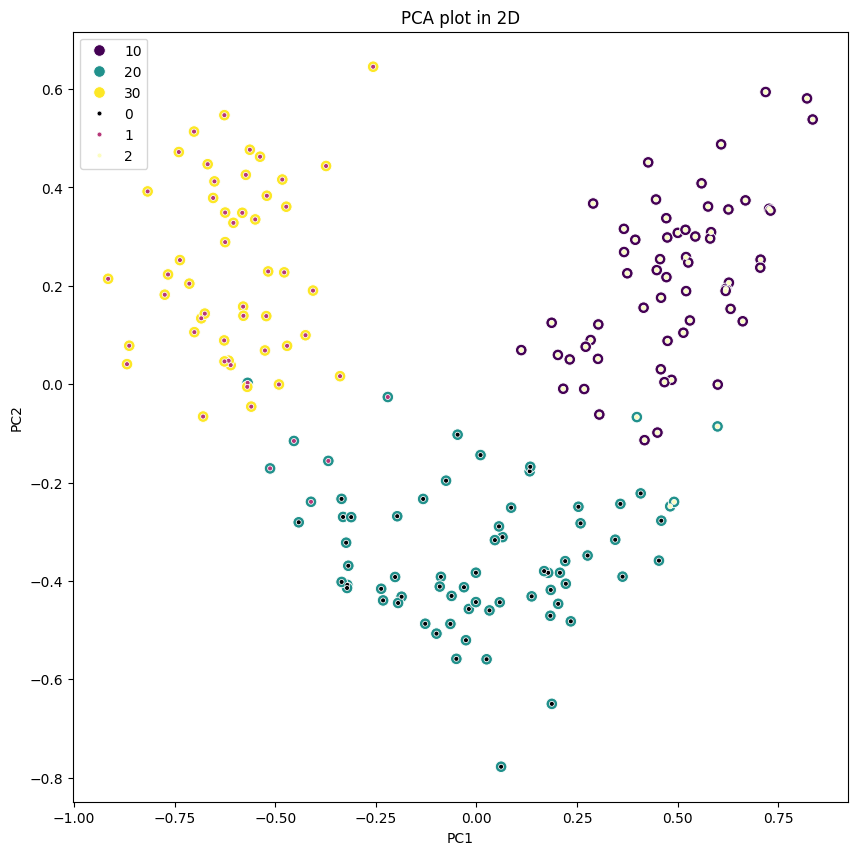

In [33]:
principal_df = pd.DataFrame(data = PCA(n_components=2).fit_transform(X))

fig = plt.figure(figsize=(10, 10))

sns.scatterplot(x = principal_df.iloc[:,0], 
                y = principal_df.iloc[:,1], 
                hue = y,
                palette="viridis", 
                s=70)
sns.scatterplot(x = principal_df.iloc[:,0], 
                y = principal_df.iloc[:,1], 
                hue = kmeans.labels_, 
                palette="magma", 
                marker=".", 
                s=50)

plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2');

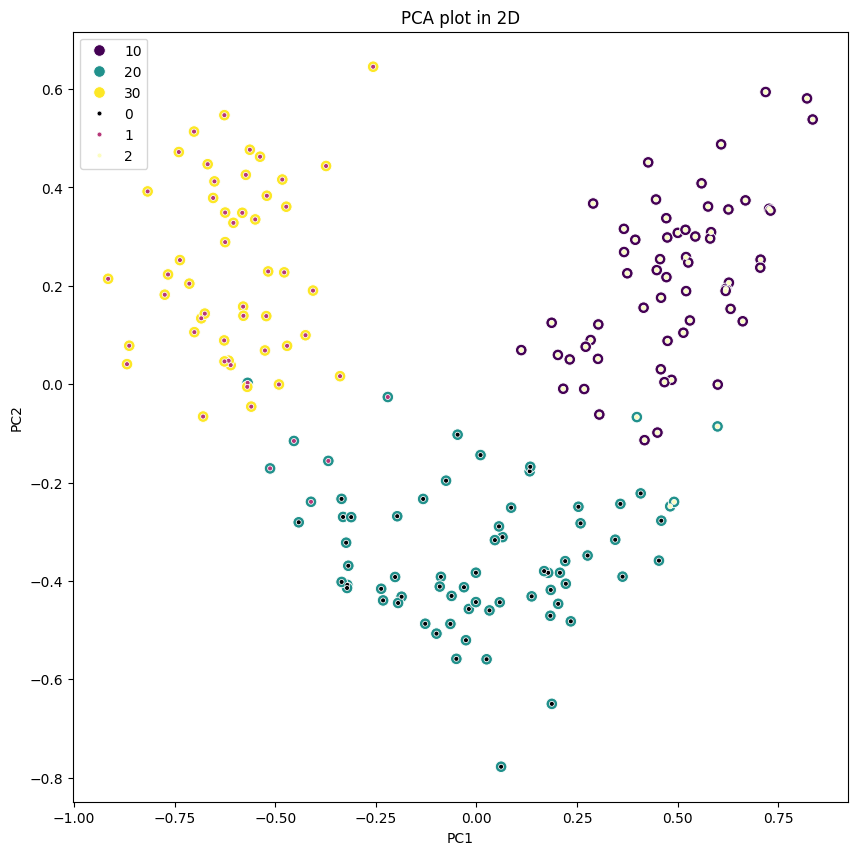

In [34]:
principal_df = pd.DataFrame(data = PCA(n_components=2).fit_transform(X))

fig = plt.figure(figsize=(10, 10))

sns.scatterplot(x = principal_df.iloc[:,0], 
                y = principal_df.iloc[:,1], 
                hue = y,
                palette="viridis", 
                s=70)
sns.scatterplot(x = principal_df.iloc[:,0], 
                y = principal_df.iloc[:,1], 
                hue = kmeans.labels_, 
                palette="magma", 
                marker=".", 
                s=50)

plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2');

 accuracy_score = 0.29213483146067415 

 52.0 значений из 178 предсказано верно 






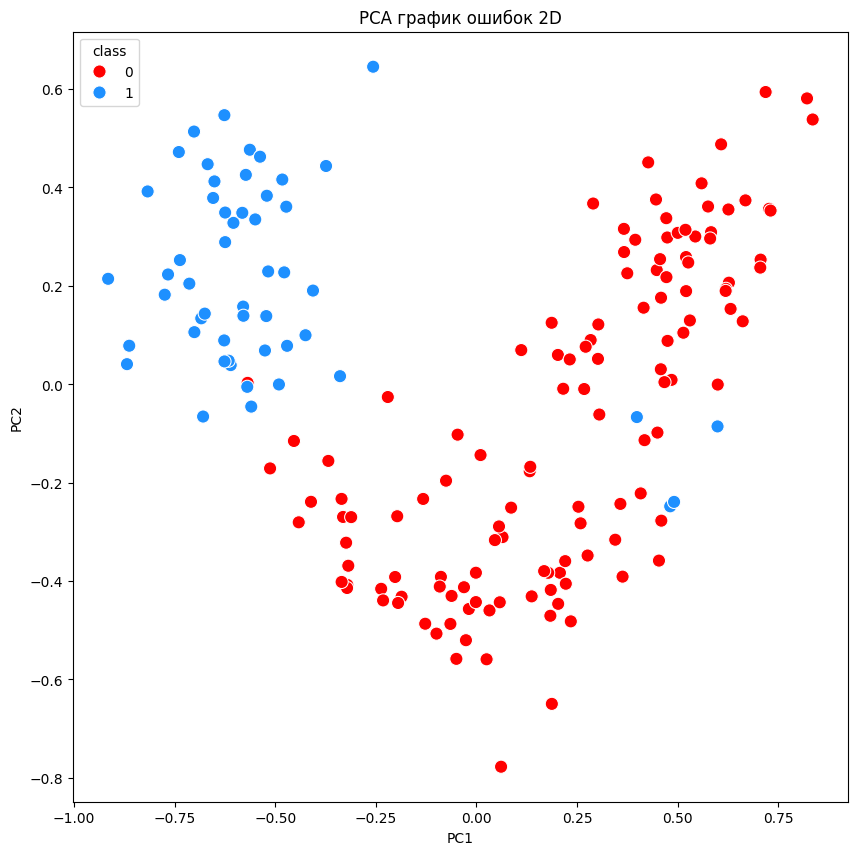

In [35]:
ACCURACY_SCORE_MY_SOLUTION(pred_k, [0,2,1], [10, 20, 30])

## Agglomerative Clustering by Ward

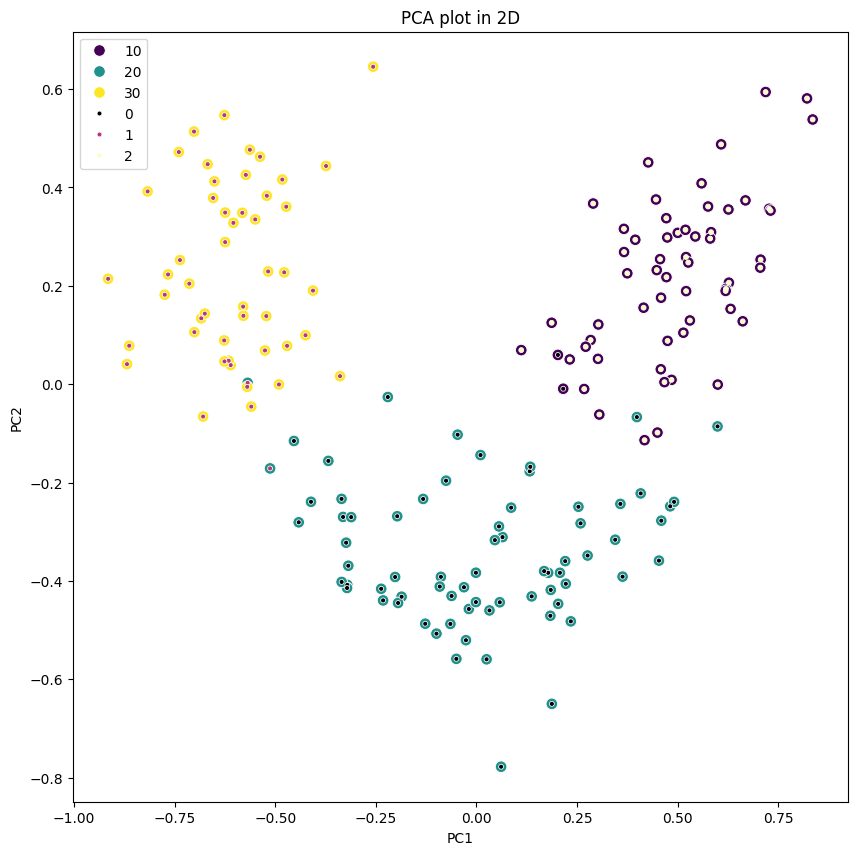

In [36]:
principal_df = pd.DataFrame(data = PCA(n_components=2).fit_transform(X))

fig = plt.figure(figsize=(10, 10))

sns.scatterplot(x = principal_df.iloc[:,0], 
                y = principal_df.iloc[:,1], 
                hue = y, 
                palette="viridis", 
                s=70)
sns.scatterplot(x = principal_df.iloc[:,0], 
                y = principal_df.iloc[:,1], 
                hue = pred_ward, 
                palette="magma", 
                marker=".", s=50)

plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2');

 accuracy_score = 0.9775280898876404 

 174.0 значений из 178 предсказано верно 






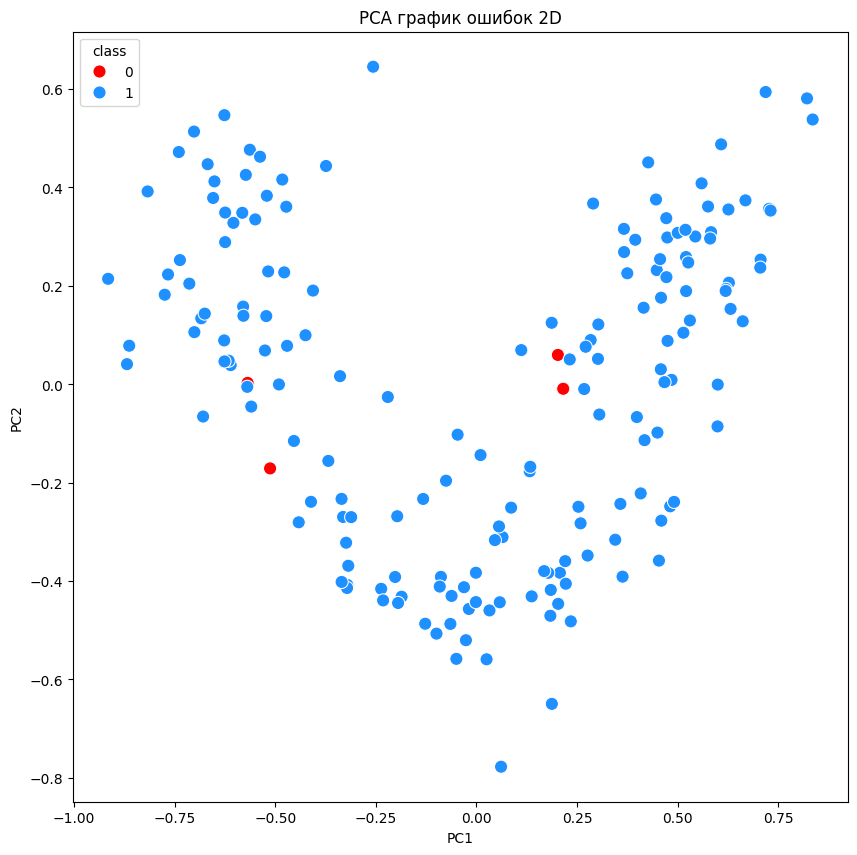

In [37]:
ACCURACY_SCORE_MY_SOLUTION(pred_ward, [2,0,1], [10, 20, 30])

## Spectral Clustering

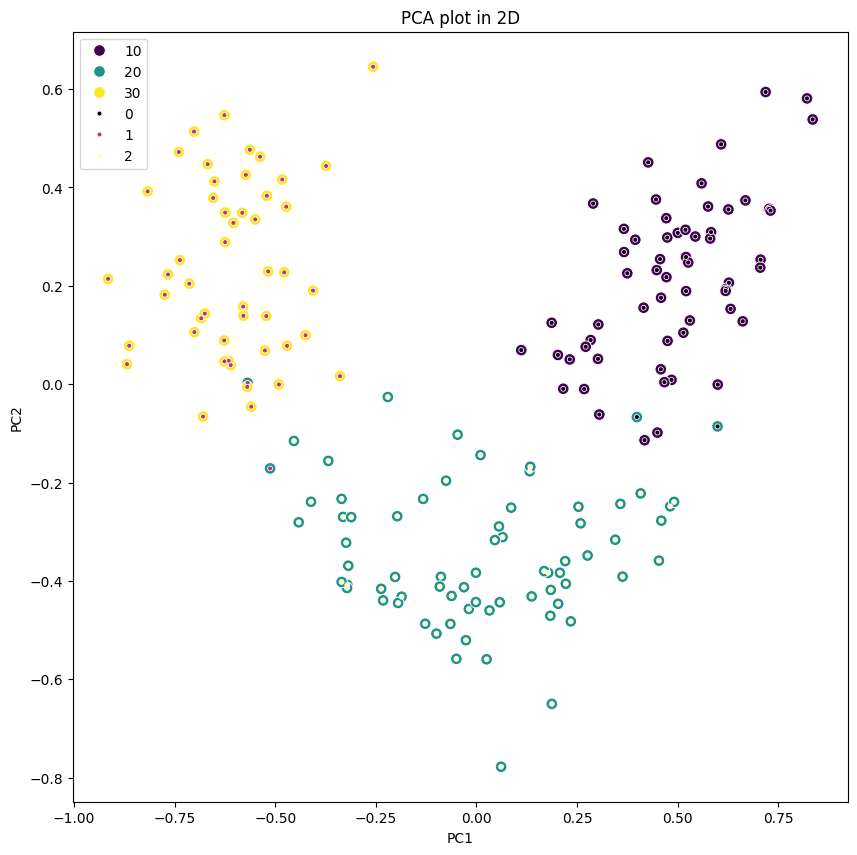

In [38]:
principal_df = pd.DataFrame(data = PCA(n_components=2).fit_transform(X))

fig = plt.figure(figsize=(10, 10))

sns.scatterplot(x = principal_df.iloc[:,0], 
                y = principal_df.iloc[:,1], 
                hue = y, 
                palette="viridis", 
                s=70)
sns.scatterplot(x = principal_df.iloc[:,0], 
                y = principal_df.iloc[:,1], 
                hue = pred_sp, 
                palette="magma", 
                marker=".", 
                s=50)

plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2');

 accuracy_score = 0.2808988764044944 

 50.0 значений из 178 предсказано верно 






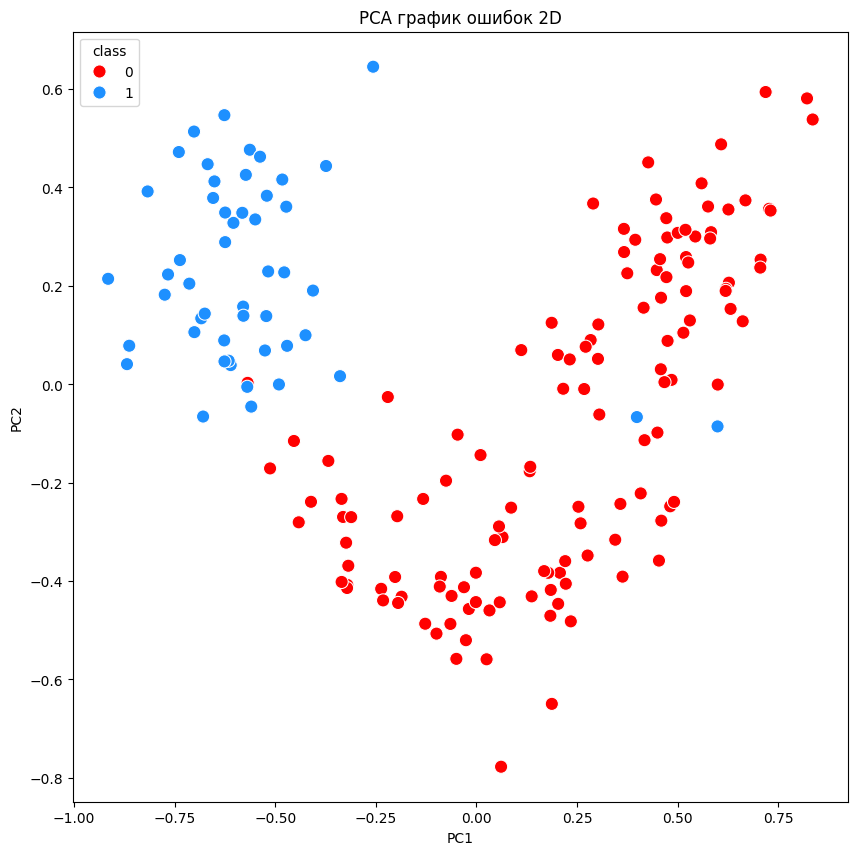

In [39]:
ACCURACY_SCORE_MY_SOLUTION(pred_sp, [2,0,1], [10, 20, 30])

## Распределение атрибутов реальных кластеров

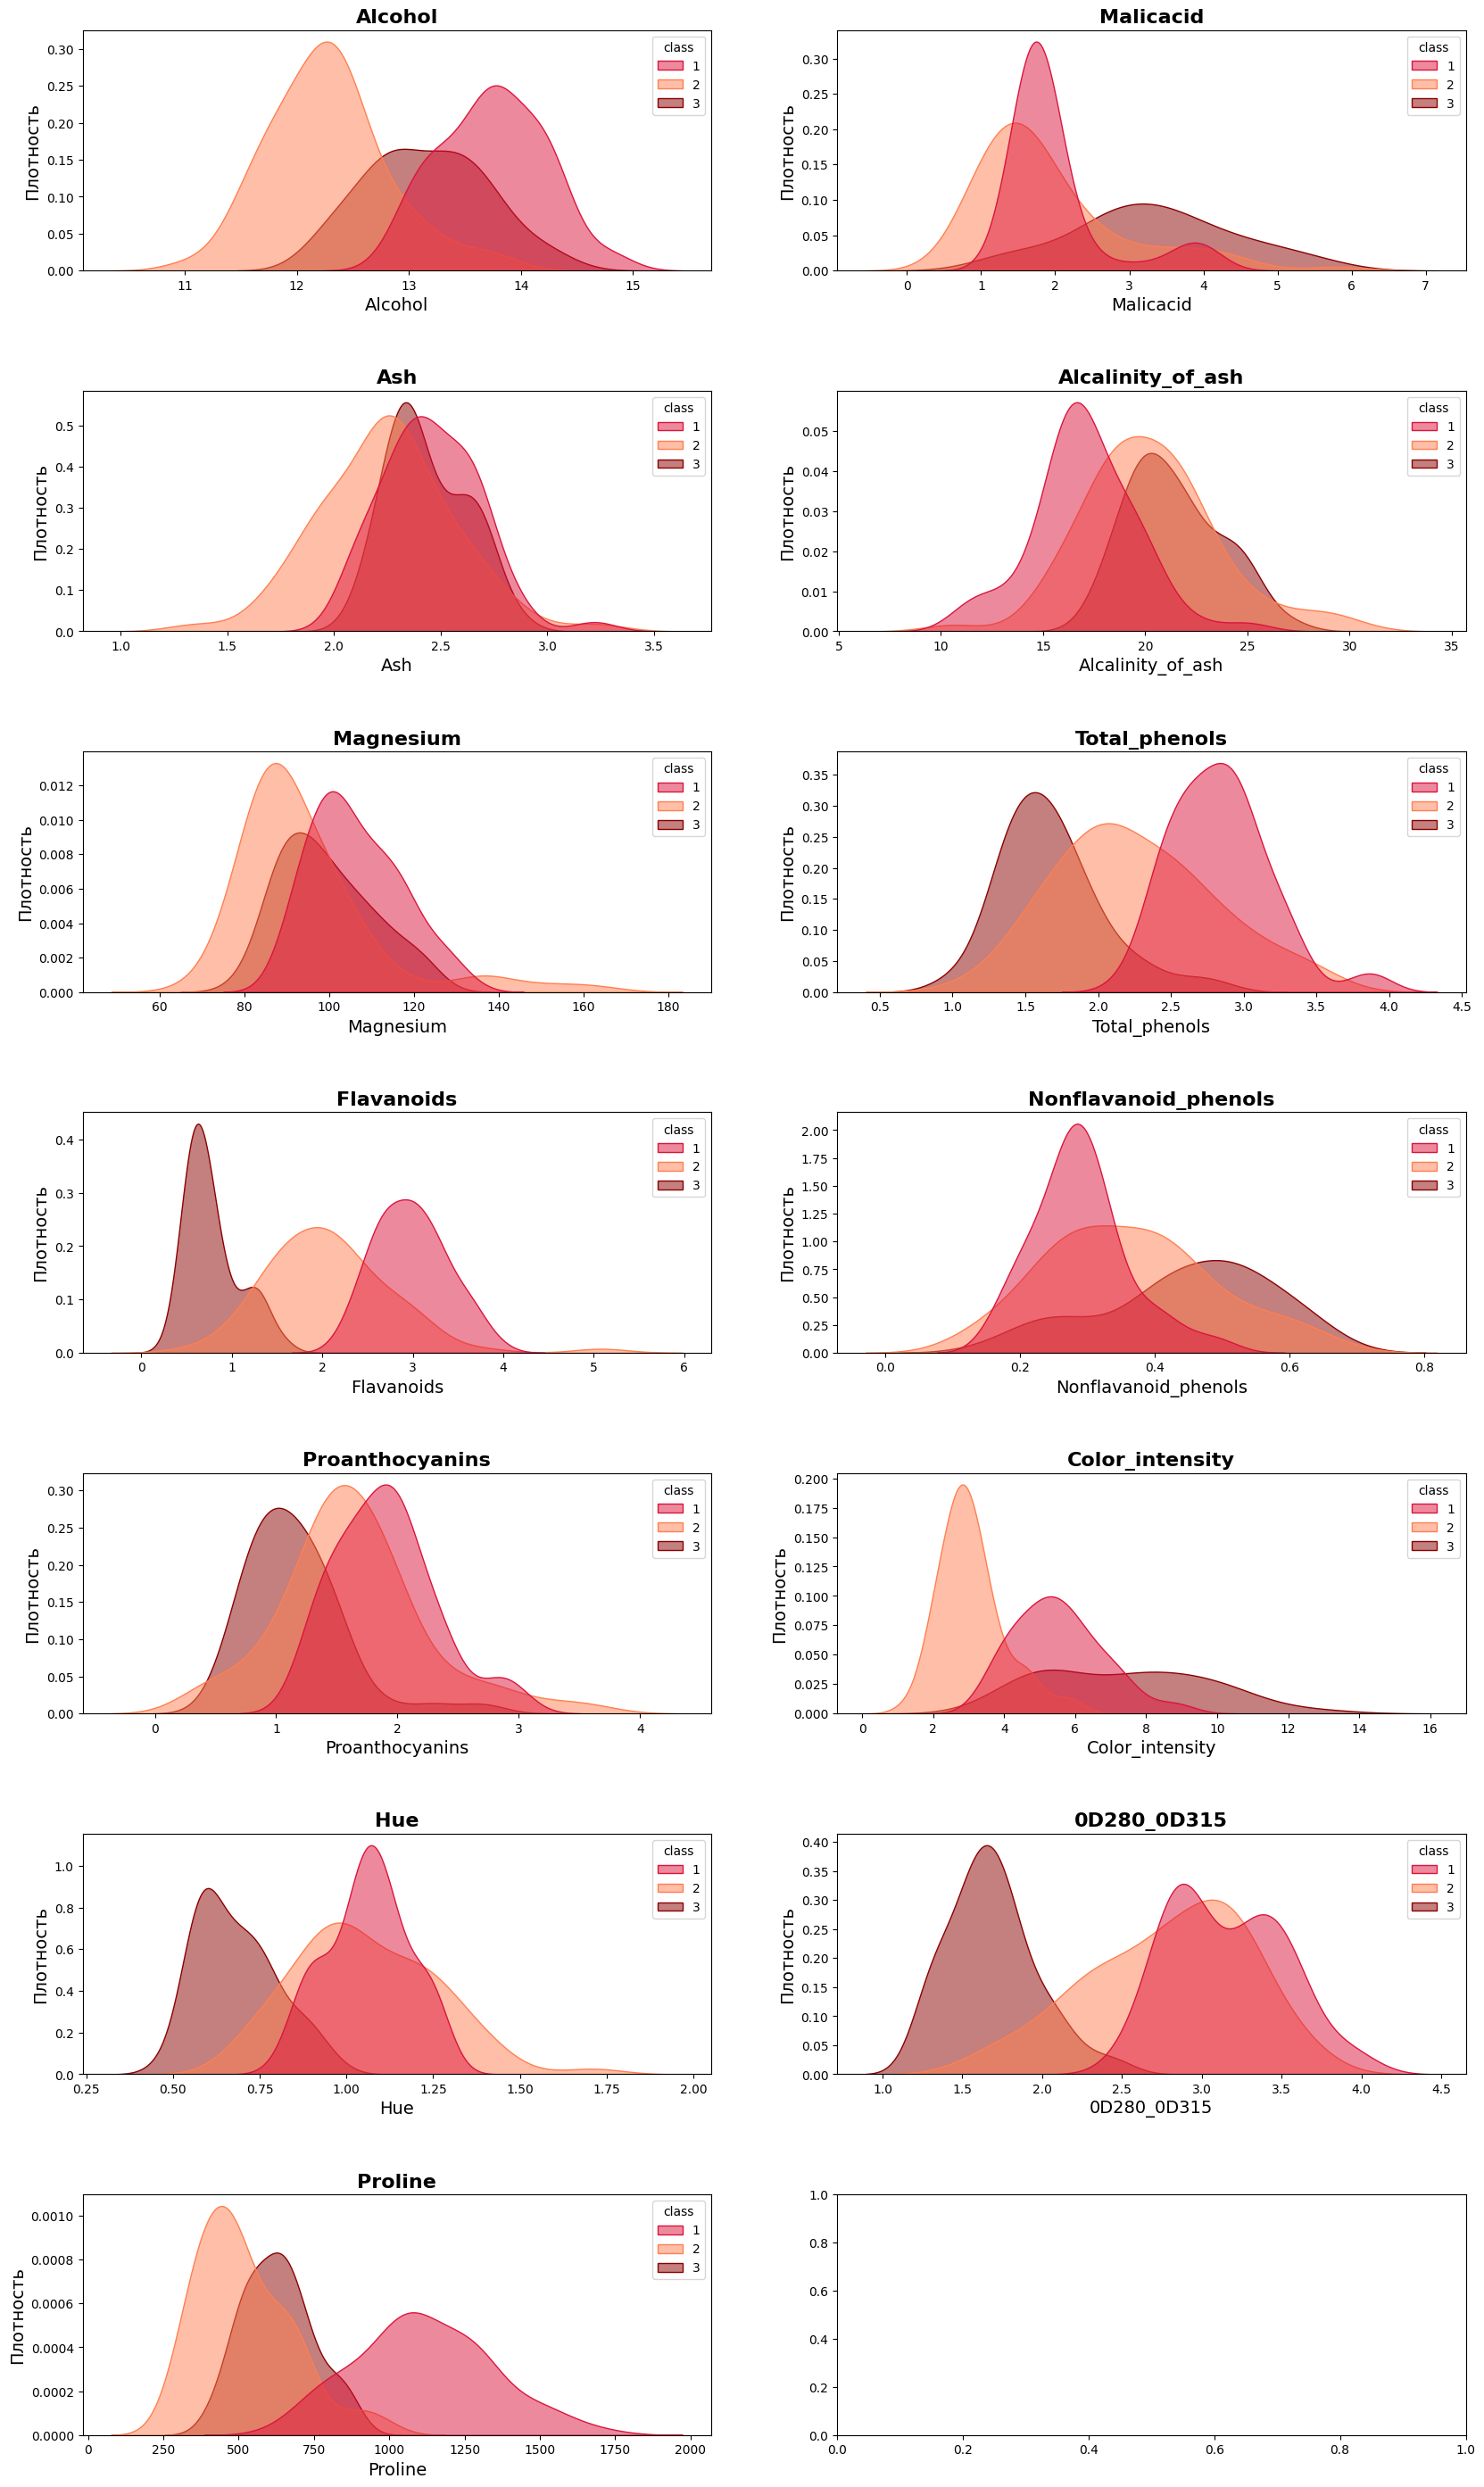

In [40]:
# Создаем матрицу графиков для визуализации распредления по каждой переменной
fig, axes = plt.subplots(7,2, figsize = (20,35))

# Расстояние между графиками
plt.subplots_adjust(hspace=0.5)

# Список значений признаков для цикла
columns = df.columns[1:]

# Строим распределения (kdeplot) для каждого признака
for i, column in enumerate(columns):
    ax = axes[i // 2, i % 2]
    sns.kdeplot(data = df,
                palette = ['#DC143C','#FF7F50','#8B0000'],
                x = column,
                fill = True,
                alpha = 0.5,
                hue = 'class',
                ax = ax)
    
    ax.set_title(column, fontweight = 'bold', fontsize = 16)
    ax.set_xlabel(column, fontsize = 14)
    ax.set_ylabel('Плотность', fontsize = 14)
    

plt.show()

<h1 id="aa" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Заключение </h1>

В ходе работы были выполнены все задачи, поставленные в начале. Также предложено решение проблемы метрик кластеризации, которое решает проблему применения метрики ACCURACY_SCORE для обучения без учителя. 


Методы, выбранные для моделирования, сработали отлично. K-Means показал себя вполне достойно, но Spectral Clustering и Agglomerative Clustering by Ward показали еще лучшие результаты, предсказав правильно почти 98% данных.
<img src="https://catherineasquithgallery.com/uploads/posts/2021-03/1614584786_48-p-vino-na-belom-fone-52.jpg">